In [1]:
import numpy as np
from ExtendedTSSRP import ExtendedTSSRP
from MSSRP import MSSRP
from TSSRP import TSSRP
import time
nmodels = 3
model_all = [[] for i in range(nmodels)]
model_name = ['E_srp_T2','E_srp_T1_Max','srp_M']

# Tonnage

In [2]:
import scipy.io as io
import matplotlib.pyplot as plt
import numpy as np
data = io.loadmat('data/tonnage.mat')

In [3]:
X = data['X']
y = data['y'][:,0]
np.moveaxis(X,0,1).shape

(4, 1201, 582)

In [4]:
vx = np.moveaxis(X,0,1).reshape(-1,582).T # Reshape the data
y[y==5]=2 # Relabel the label '5' to '2' 

data_normal = vx[y==0] # Select label 0 as normal sample
nNormalSample = vx[y==0].shape[0]
p = vx.shape[1] # Dimensionality of the data
nFailureMode = np.max(y)-1 # Falure Mode Number
nAbnormalSample = vx[y==1].shape[0] # sample number
data_abnormal = np.zeros((nFailureMode,nAbnormalSample,p)) # 5 failure modes, 69 samples, with 4804 dimension
for i in range(1,nFailureMode+1):
    data_abnormal[i-1] = vx[y==i]

In [11]:
data_abnormal.shape

(3, 69, 4804)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


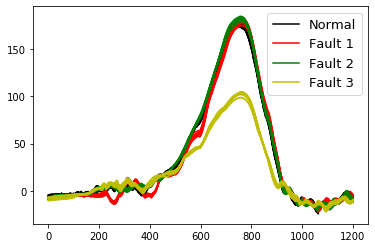

In [26]:
plt.plot(data_normal[0:10].reshape(10,4,1201)[:,0].T,'k')
plt.plot(data_normal[0].reshape(1,4,1201)[:,0].T,'k',label='Normal')
notation = ['r','g','y']
Faultlist = ['Fault 1', 'Fault 2', 'Fault 3']
for i in range(3):
    plt.plot(data_abnormal[i][0:10].reshape(10,4,1201)[:,0].T,notation[i])
    plt.plot(data_abnormal[i][0].reshape(1,4,1201)[:,0].T,notation[i],label=Faultlist[i])
plt.legend(prop={'size': 13})

plt.savefig('tonnage.eps')


In [5]:
data_normal_diff = np.diff(data_normal,n=1,axis=0)
data_normal_diff_mean = np.mean(data_normal_diff,axis=0)
data_normal_diff_std = np.std(data_normal_diff,axis=0)
data_normal_diff = data_normal_diff - data_normal_diff_mean[np.newaxis,:]
data_normal_diff = data_normal_diff/data_normal_diff_std[np.newaxis,:]

data_abnormal_diff = np.diff(data_abnormal,n=1,axis=1)
data_abnormal_diff = data_abnormal_diff - data_normal_diff_mean[np.newaxis,np.newaxis,:]
data_abnormal_diff = data_abnormal_diff/data_normal_diff_std[np.newaxis,:]

In [6]:
data_abnormal_mean = [[] for i in range(nFailureMode)]
data_abnormal_std = [[] for i in range(nFailureMode)]
M = np.zeros((nFailureMode,4804))
for i in range(nFailureMode):
    M[i] = np.mean(data_abnormal_diff[i],axis=0)
    M[i] = M[i] / np.sqrt(np.sum(M[i]**2))
M = M.T

In [7]:
M.shape

(4804, 3)

In [24]:
normal_index = np.random.choice(nNormalSample-1, size=500, replace=True)
abormal_index = np.random.choice(nAbnormalSample-1, size=500, replace=True)

all_Simulated_data = [[] for i in range(nFailureMode)]
for i in range(nFailureMode):
    all_Simulated_data[i] = np.concatenate((data_normal_diff[normal_index,:],data_abnormal_diff[i][abormal_index,:]))

In [25]:
all_Simulated_data[i].shape

(1000, 4804)

In [38]:
p = 4804 # Number of dimensions
c = 2 # Target meanshift is c * M
Ks = 2   #Select Top Ks control chart
T0 = 500
k = 3
nmodels = 2

nsensors = 100 # Number of selected sensors
experiment_log = {'c':c, 'Ks':Ks, 'statistics':[[] for i in range(nmodels)],
                  'sens_history':[[] for i in range(nmodels)],
                  'mode_history':[[] for i in range(nmodels)],
                  'seq_stats':[[] for i in range(nmodels)]}

model_all = [[] for i in range(nmodels)]
model_all[0] = ExtendedTSSRP(p, c, k, M, nsensors, Ks, L=-1, chart = 'srp',mode='T2',decisionchart=1)
model_all[1] = ExtendedTSSRP(p, c, k, M, nsensors, Ks, L=-1, chart = 'srp',mode='T1_Max',decisionchart=1)
failure_idx = 0
model_idx = 0
all_Simulated_data[failure_idx].shape

(1000, 4804)

In [39]:
sequential_statistis_topRsum.shape

(1000,)

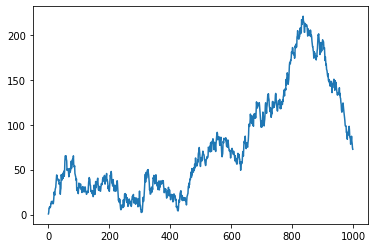

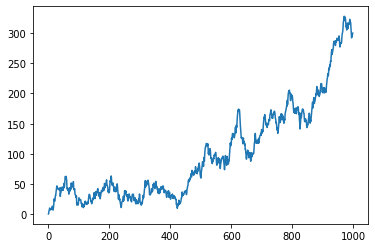

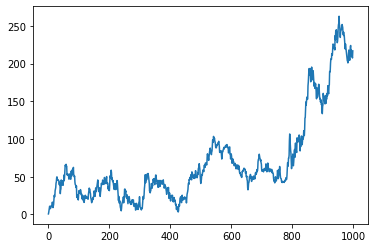

In [40]:
sequential_statistics_topRsum = 0
for failure_idx in range(3):
    sequential_statistis_topRsum, sensor_selection_history, failure_mode_history, i,sequential_statistics = model_all[0].compute_monitoring_statistics(all_Simulated_data[failure_idx],T0,-1)
    plt.figure()
    plt.plot(sequential_statistis_topRsum)